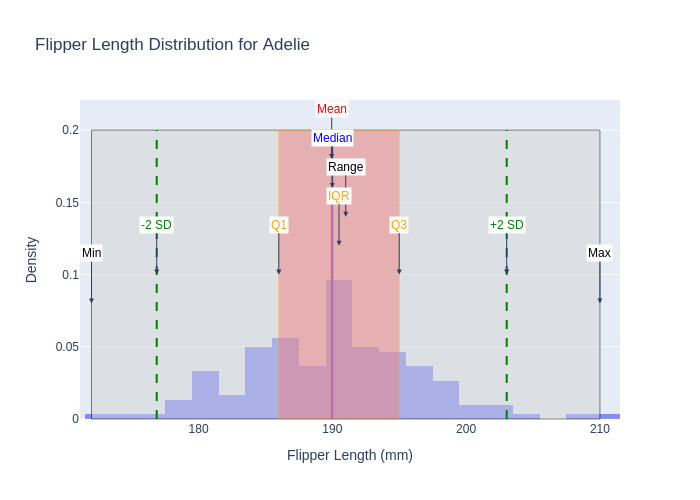

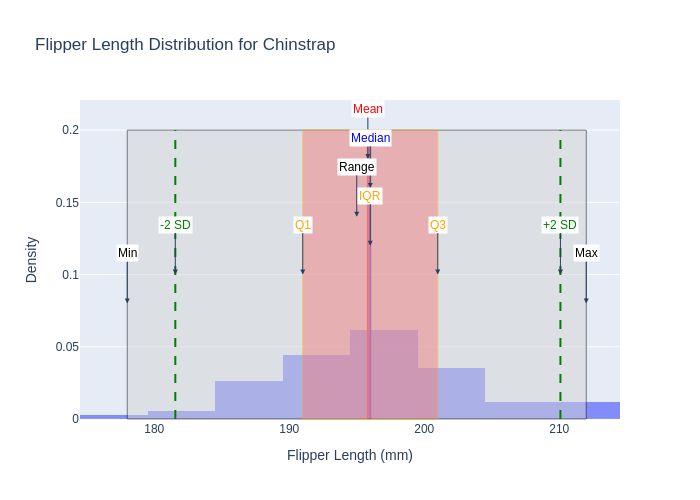

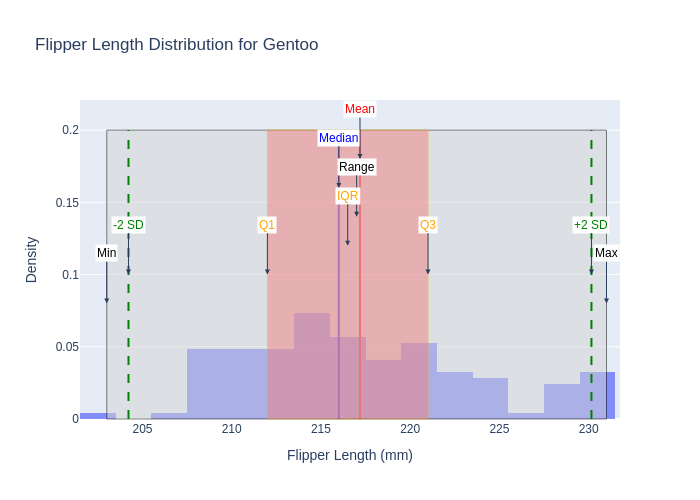

In [4]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a list of unique species
species = penguins['species'].unique()

# Initialize an empty list to hold figures
figures = []

# Loop through each species and create a histogram
for sp in species:
    # Filter the data for the current species
    data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    min_value = data.min()
    max_value = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std_dev = data.std()

    # Create the histogram
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data, histnorm='probability density', name=sp, opacity=0.75))

    # Add mean and median lines
    fig.add_shape(type='line', x0=mean, x1=mean, y0=0, y1=0.2,
                  line=dict(color='red', width=2), 
                  name='Mean')
    fig.add_shape(type='line', x0=median, x1=median, y0=0, y1=0.2,
                  line=dict(color='blue', width=2), 
                  name='Median')

    # Add annotations for mean and median with adjusted positions
    fig.add_annotation(x=mean, y=0.18, text='Mean', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='red'), bgcolor='white')
    fig.add_annotation(x=median, y=0.16, text='Median', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='blue'), bgcolor='white')

    # Add range rectangle
    fig.add_shape(type='rect', x0=min_value, x1=max_value, y0=0, y1=0.2,
                  line=dict(color='black', width=1), fillcolor='lightgrey', opacity=0.5,
                  name='Range')
    fig.add_annotation(x=(min_value + max_value) / 2, y=0.14, text='Range', showarrow=True, 
                       arrowhead=2, ax=0, ay=-50, font=dict(color='black'), bgcolor='white')
    
    # Add IQR rectangle
    fig.add_shape(type='rect', x0=q1, x1=q3, y0=0, y1=0.2,
                  line=dict(color='orange', width=1), fillcolor='lightcoral', opacity=0.5,
                  name='IQR')
    fig.add_annotation(x=(q1 + q3) / 2, y=0.12, text='IQR', showarrow=True, 
                       arrowhead=2, ax=0, ay=-50, font=dict(color='orange'), bgcolor='white')

    # Add standard deviation lines
    fig.add_shape(type='line', x0=mean - 2 * std_dev, x1=mean - 2 * std_dev, y0=0, y1=0.2,
                  line=dict(color='green', dash='dash'), name='-2 SD')
    fig.add_annotation(x=mean - 2 * std_dev, y=0.10, text='-2 SD', showarrow=True, 
                       arrowhead=2, ax=0, ay=-50, font=dict(color='green'), bgcolor='white')
    
    fig.add_shape(type='line', x0=mean + 2 * std_dev, x1=mean + 2 * std_dev, y0=0, y1=0.2,
                  line=dict(color='green', dash='dash'), name='+2 SD')
    fig.add_annotation(x=mean + 2 * std_dev, y=0.10, text='+2 SD', showarrow=True, 
                       arrowhead=2, ax=0, ay=-50, font=dict(color='green'), bgcolor='white')

    # Add annotations for quartiles and min/max values
    fig.add_annotation(x=min_value, y=0.08, text='Min', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='black'), bgcolor='white')
    fig.add_annotation(x=max_value, y=0.08, text='Max', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='black'), bgcolor='white')
    fig.add_annotation(x=q1, y=0.10, text='Q1', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='orange'), bgcolor='white')
    fig.add_annotation(x=q3, y=0.10, text='Q3', showarrow=True, arrowhead=2,
                       ax=0, ay=-50, font=dict(color='orange'), bgcolor='white')

    # Update layout
    fig.update_layout(title=f'Flipper Length Distribution for {sp}',
                      xaxis_title='Flipper Length (mm)',
                      yaxis_title='Density',
                      barmode='overlay',
                      legend=dict(title='Statistics'))

    # Add custom legend for rectangles and lines
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', line=dict(color='black'), name='Range'))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', line=dict(color='orange'), name='IQR'))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', line=dict(color='green', dash='dash'), name='±2 SD'))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', line=dict(color='red'), name='Mean'))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', line=dict(color='blue'), name='Median'))

    figures.append(fig)

# Show figures
for fig in figures:
    fig.show(renderer="png")


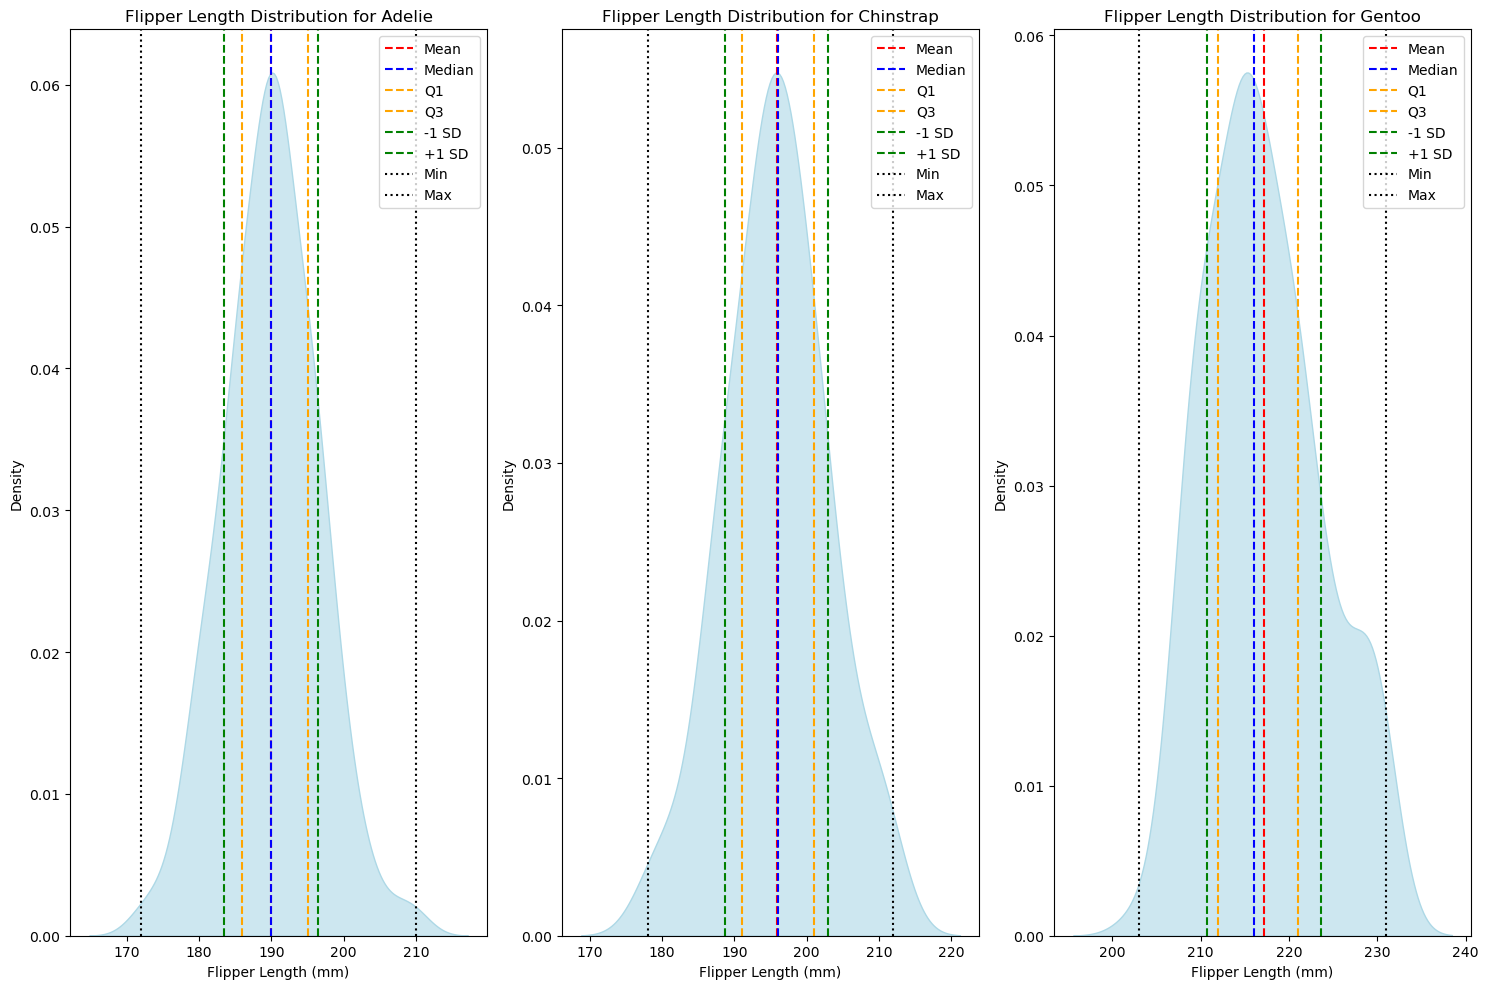

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Set up the plotting area
plt.figure(figsize=(15, 10))
species = penguins['species'].unique()

# Loop through each species to create a KDE plot
for i, sp in enumerate(species):
    # Filter the data for the current species
    data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std_dev = data.std()
    min_value = data.min()
    max_value = data.max()
    
    # Create a subplot for each species
    plt.subplot(1, 3, i + 1)  # Adjust the number of columns as needed
    sns.kdeplot(data, fill=True, color='lightblue', alpha=0.6)
    
    # Add mean and median lines
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='blue', linestyle='--', label='Median')
    
    # Add quartile lines
    plt.axvline(q1, color='orange', linestyle='--', label='Q1')
    plt.axvline(q3, color='orange', linestyle='--', label='Q3')
    
    # Add standard deviation lines
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', label='-1 SD')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', label='+1 SD')
    
    # Add min and max lines
    plt.axvline(min_value, color='black', linestyle=':', label='Min')
    plt.axvline(max_value, color='black', linestyle=':', label='Max')
    
    # Set plot title and labels
    plt.title(f'Flipper Length Distribution for {sp}')
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Homework Assignment Summary

**Objective**: Understand different methods for displaying data distribution, specifically box plots, histograms, and KDE plots, using the penguins dataset.

1. **Data Analysis**:
   - We explored the penguins dataset to analyze the distribution of flipper lengths across different species.

2. **Visualization Techniques**:
   - **Box Plots**: 
     - **Pros**: Summarizes median, quartiles, and outliers; great for comparing groups.
     - **Cons**: Limited detail on distribution shape; does not show frequency.
   - **Histograms**:
     - **Pros**: Effectively shows the shape and frequency distribution; simple and accessible.
     - **Cons**: Sensitive to bin size; does not indicate median or quartiles directly.
   - **KDE Plots**:
     - **Pros**: Provides a smooth representation of distribution; good for comparing multiple groups.
     - **Cons**: Sensitive to bandwidth selection; may misrepresent small sample sizes.

3. **Code Implementation**:
   - We implemented visualizations using both Plotly for histograms and seaborn for KDE plots, ensuring clarity with annotations for statistical measures like mean, median, quartiles, and standard deviation.

4. **Conclusion**:
   - Each method has unique strengths and weaknesses. Box plots are excellent for comparison, histograms visualize overall distribution, and KDE plots provide detailed insights into distribution shapes. Understanding these tools helps in choosing the appropriate visualization based on data characteristics and analysis goals.

## Q3. 
Box plots can be useful for comparing different models of data while histograms can be used to clearly represent the distribution of data throughout the population, best for small populations. KDE plots also show the distribution but with a smoother curve. more representative of a larger population. Each has its own uses and should be used accordingly, but KDE plots are prefered by me since they are the most important when sampling a sizable population and must be most commonly used.

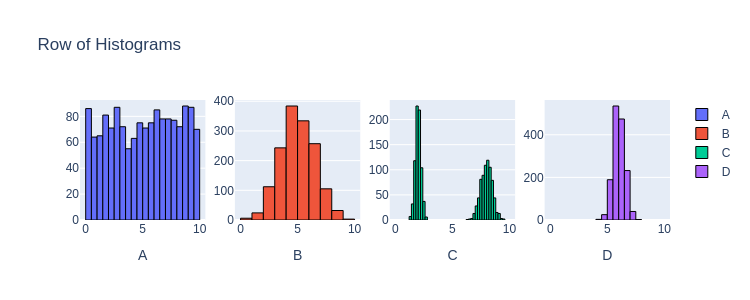

In [11]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
#### Which datasets have similar means and similar variances
A and C, mean around 5, high variance
#### Which datasets have similar means but quite different variances
A and B or B and C; mean around 5, B has a much lower variance than both.
#### Which datasets have similar variances but quite different means
B and D have closest variances and different means
#### Which datasets have quite different means and quite different variances
A and D or A and C; D has mean around 6 while the others have around 5, D has much lower variance than both

## 5. explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.
Mean and median are both measures of central tendency, and therefore can together indicate the skewness of data, since when the two values are not equal it indicates that the data contains disproportionately more large values or disproprtionately more small values. The former case entails a right skew or positively skewed data, which has a mean larger than the median since the larger values make the mean larger. The latter case is a left skew or negatively skewed data with mean smaller than median since the smaller values make it smaller. A uniform distribution has mean and median equal or almost equal.

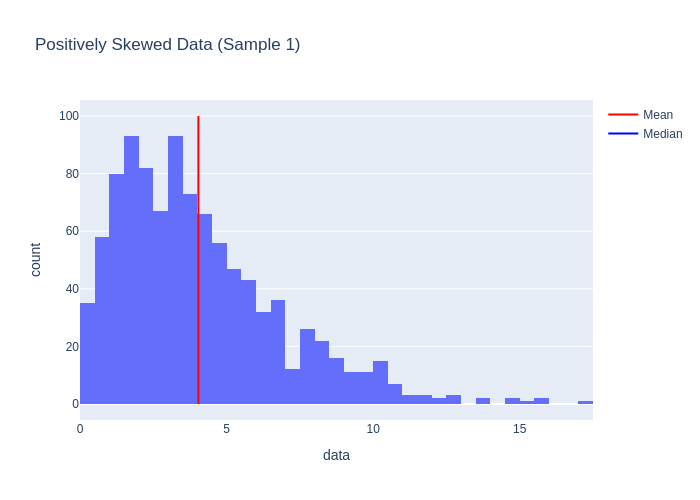

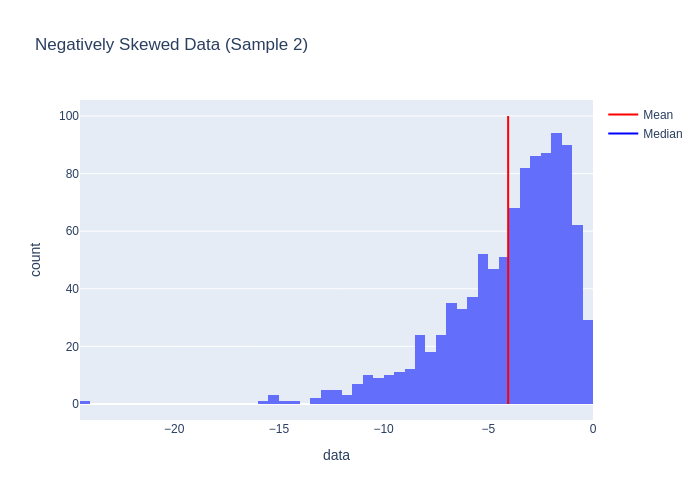

In [22]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Generate positively skewed data
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for sample1
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])

# Create histogram for sample1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Positively Skewed Data (Sample 1)")
fig1.add_scatter(x=[mean1]*2, y=[0, 100], mode='lines', name='Mean', line=dict(color='red', width=2))
fig1.add_scatter(x=[median1]*2, y=[0, 100], mode='lines', name='Median', line=dict(color='blue', width=2))
fig1.show(renderer="png")

# Generate negatively skewed data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for sample2
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

# Create histogram for sample2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Negatively Skewed Data (Sample 2)")
fig2.add_scatter(x=[mean2]*2, y=[0, 100], mode='lines', name='Mean', line=dict(color='red', width=2))
fig2.add_scatter(x=[median2]*2, y=[0, 100], mode='lines', name='Median', line=dict(color='blue', width=2))
fig2.show(renderer="png")

## 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3                5.7       450   
4           1000          100        4                5.7       400   

   calories from fat total fat (g)  total fat (% daily value)  \
0              120.0          13.0                       20.0   
1               70.0           8.0                       12.0   
2              200.0          23.0                       35.0   
3              250.0          28.0                       43.0   
4              210.0          23.0                       35.0   

   saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                5.0                           25.0  ...                 31   
1                3.0    

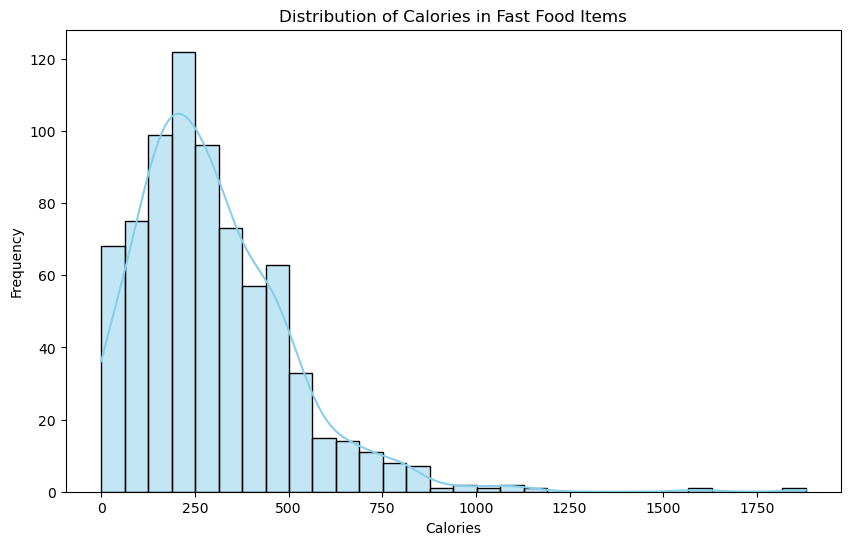

/tmp/ipykernel_53/3663425155.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




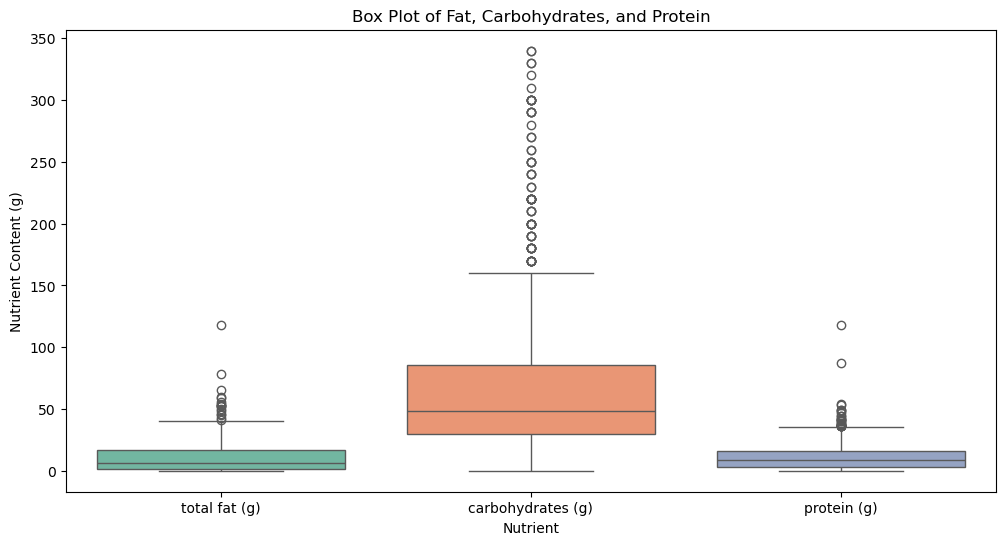

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Convert nutrient columns to numeric, coercing errors to NaN
nutrient_columns = ['total fat (g)', 'carbohydrates (g)', 'protein (g)', 'calories']
for col in nutrient_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any NaN values
print(df[nutrient_columns].isnull().sum())

# Summary statistics
summary_stats = df[nutrient_columns].describe()
print(summary_stats)

plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Reshape the DataFrame
melted_df = df.melt(value_vars=['total fat (g)', 'carbohydrates (g)', 'protein (g)'], 
                     var_name='Nutrient', 
                     value_name='Content (g)')

# Drop any rows with NaN values
melted_df = melted_df.dropna(subset=['Content (g)'])

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Nutrient', y='Content (g)', palette='Set2')
plt.title('Box Plot of Fat, Carbohydrates, and Protein')
plt.ylabel('Nutrient Content (g)')
plt.xlabel('Nutrient')
plt.show()


This displays an overview of the data and the numerical analysis followed by visualizations.

### 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [30]:
!pip install jupyter-dash
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px

# Initialize the app
app = JupyterDash(__name__)

# Define the layout
app.layout = html.Div([
    html.H4('Animated GDP and Population Over Decades'),
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=[{'label': 'GDP - Scatter', 'value': 'GDP - Scatter'},
                 {'label': 'Population - Bar', 'value': 'Population - Bar'}],
        value='GDP - Scatter',
    ),
    dcc.Loading(dcc.Graph(id="graph"), type="cube")
])

# Callback to update the graph based on the selection
@app.callback(
    Output("graph", "figure"), 
    Input("selection", "value"))
def display_animated_graph(selection):
    df = px.data.gapminder()  # Replace with your own data source
    animations = {
        'GDP - Scatter': px.scatter(
            df, x="gdpPercap", y="lifeExp", animation_frame="year", 
            animation_group="country", size="pop", color="continent", 
            hover_name="country", log_x=True, size_max=55, 
            range_x=[100, 100000], range_y=[25, 90]
        ),
        'Population - Bar': px.bar(
            df, x="continent", y="pop", color="continent", 
            animation_frame="year", animation_group="country", 
            range_y=[0, 4000000000]
        ),
    }
    return animations[selection]

# Run the app in the notebook
app.run_server(mode='inline', debug=True)


ModuleNotFoundError: No module named 'jupyter_dash'

### 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?
Yes